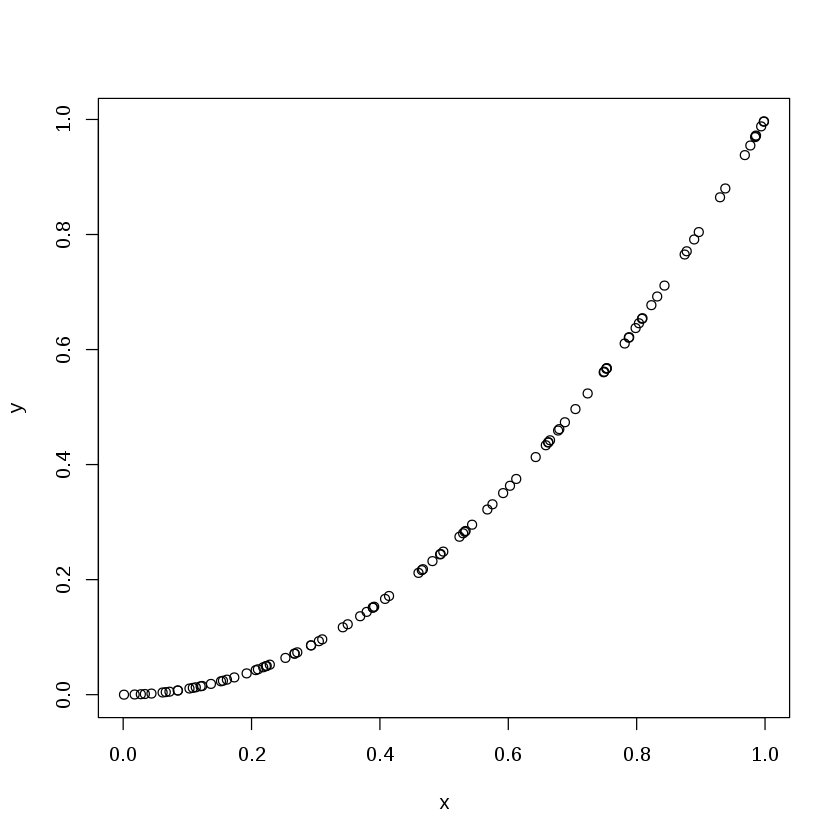

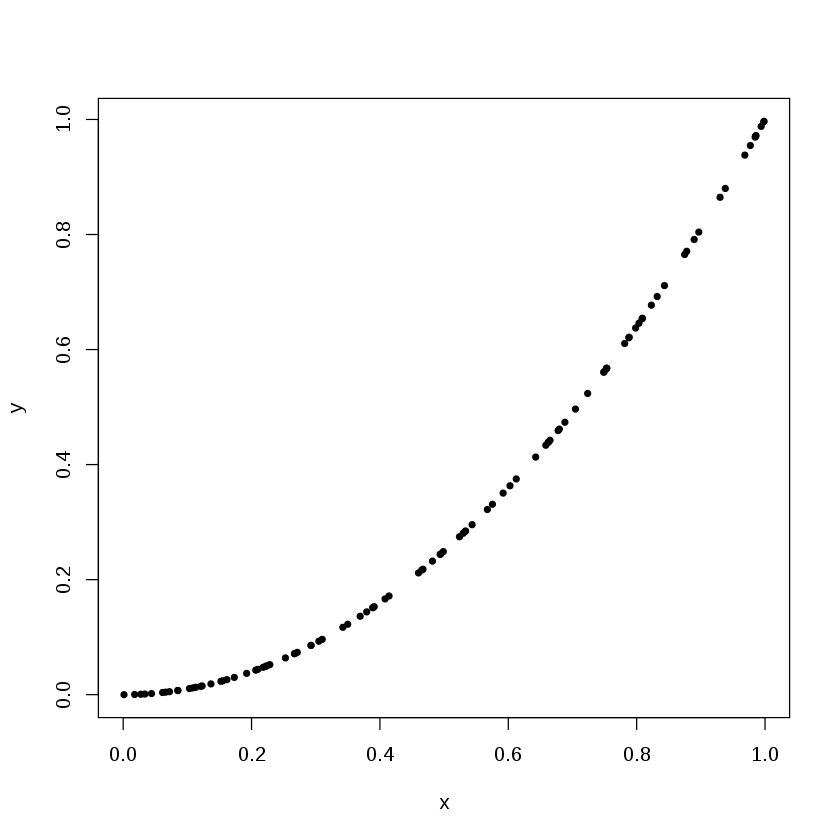

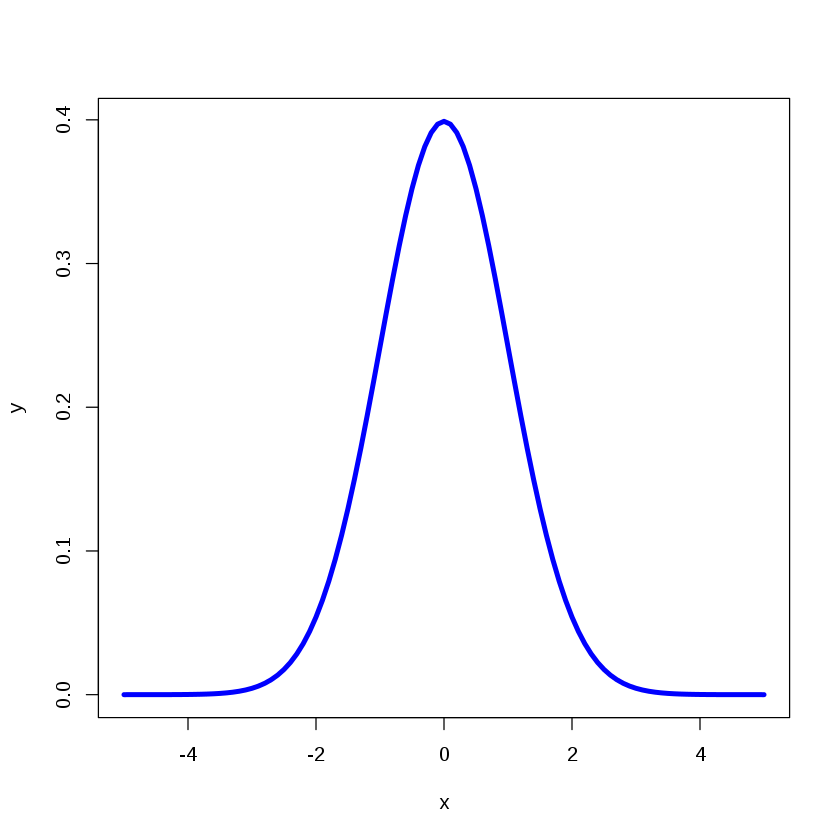

[1] -572.5628

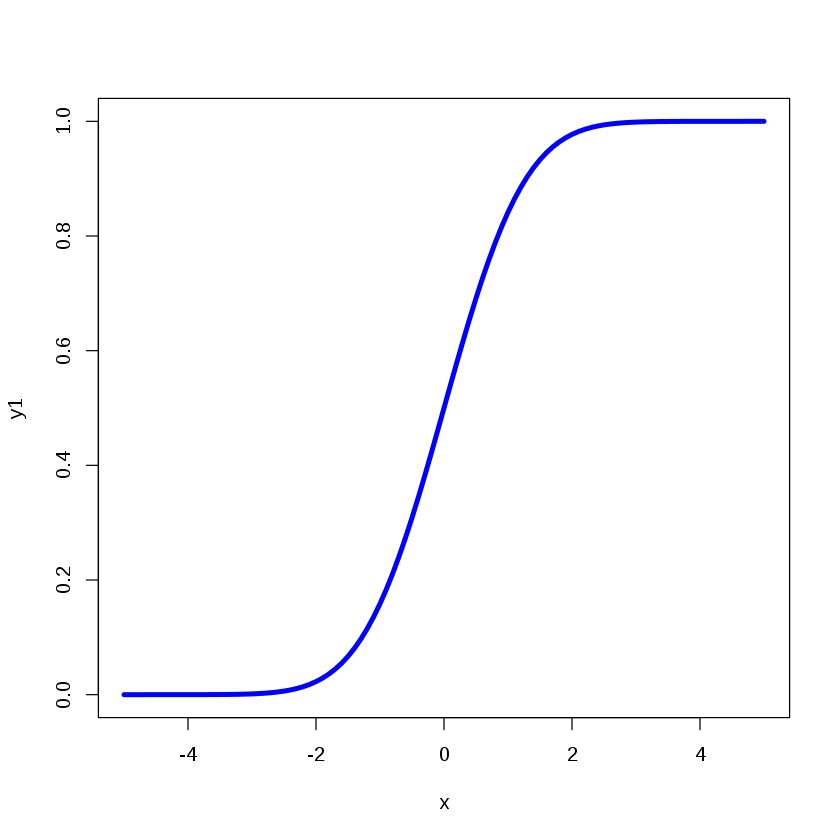

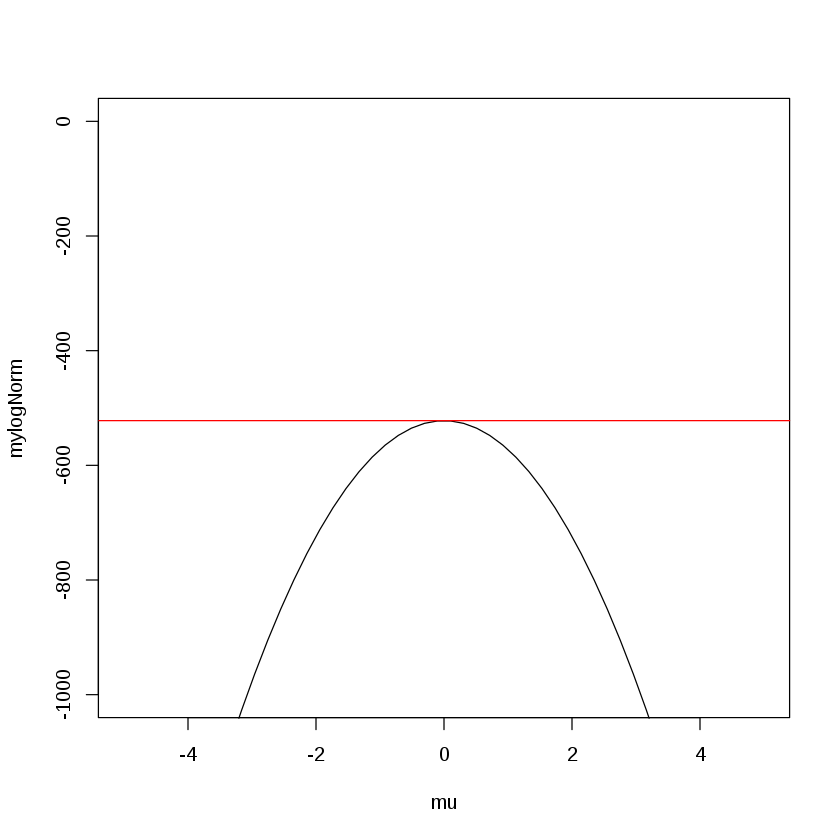

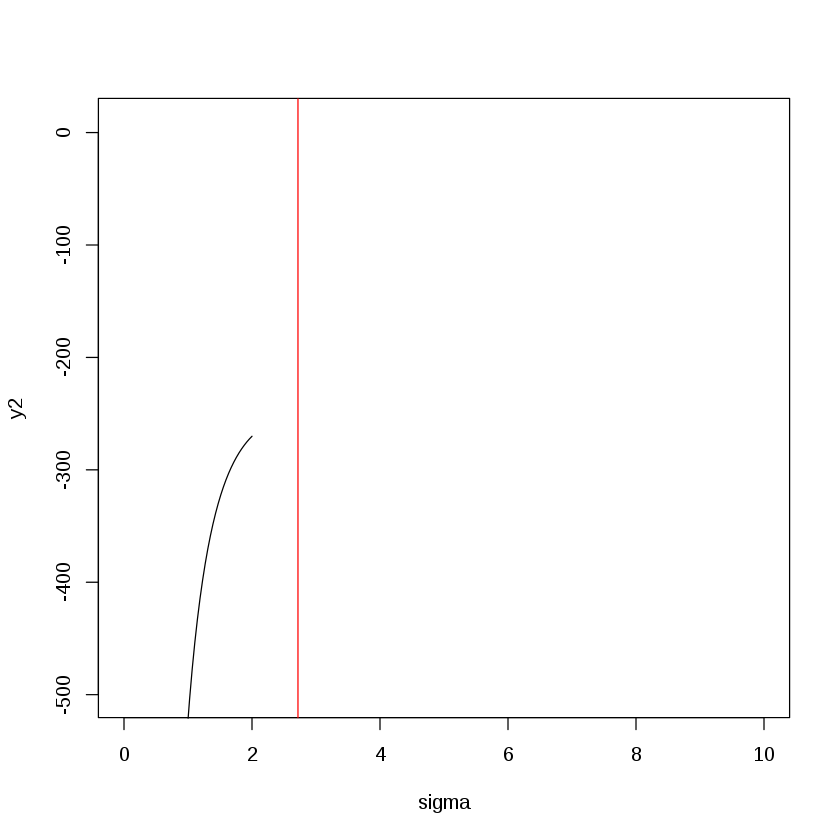

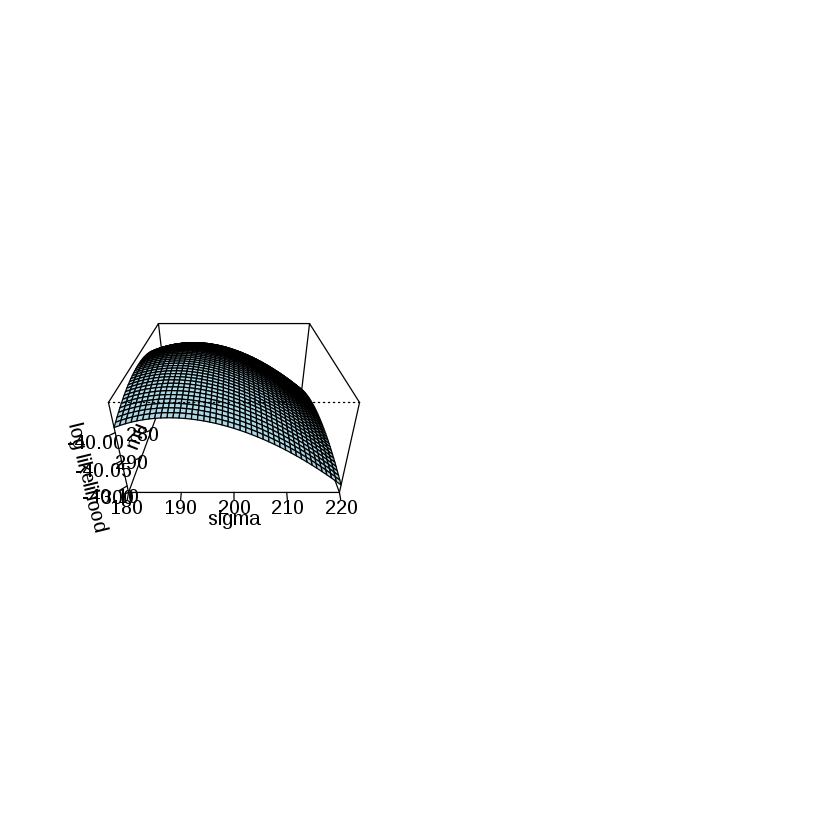

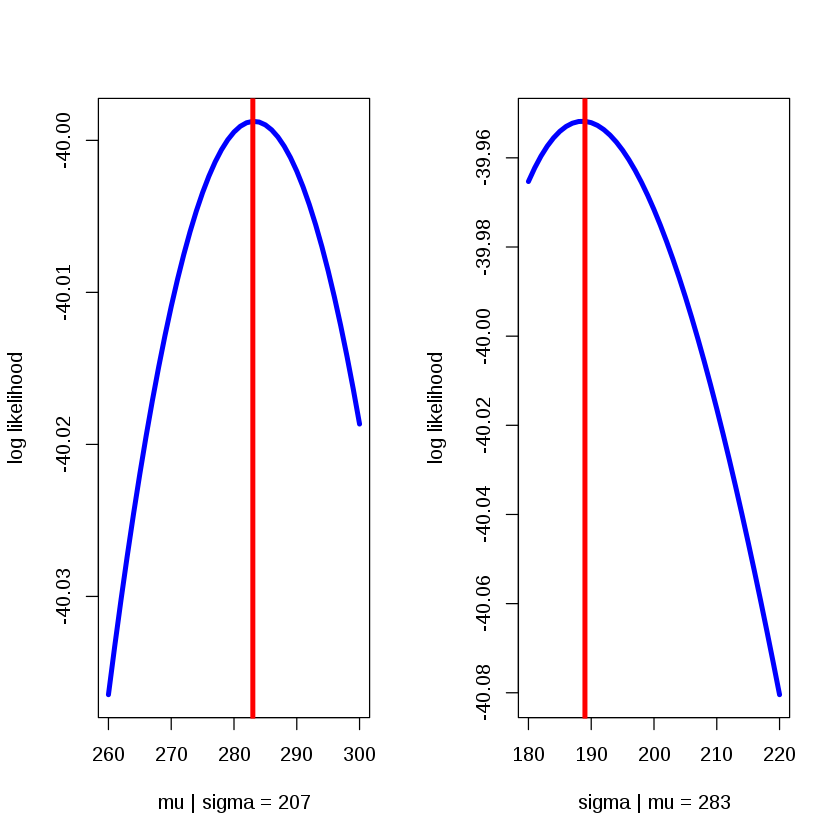

Warning message:
In dnorm(x = y, mean = mean, sd = sigma, log = TRUE): NaNs produced

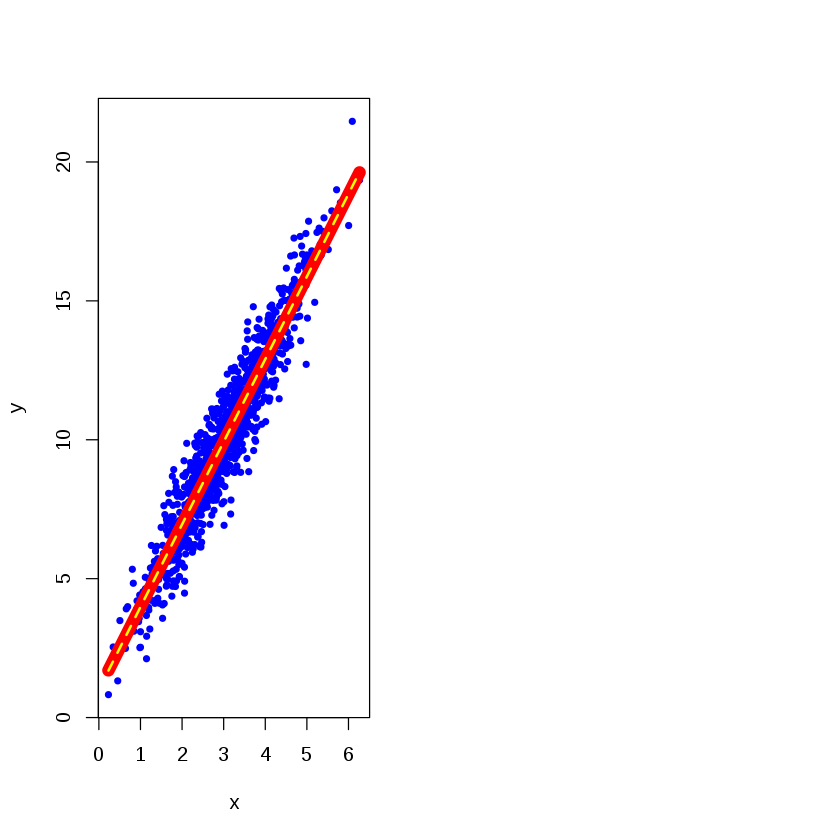

In [1]:
## plot in R
n = 100
x  =  runif(n, 0, 1)
y  = x^2

## Scatter plot
plot(x, y)
plot(x, y, pch = 20)

###------------------------------------------
### Densities and log likelihood functions
###------------------ -----------------------
x  = seq(-5, 5, 0.1)
y = dnorm(x = x, mean = 0, sd = 1)
plot(x, y, col = "blue", type = "l", lwd = 4)


y1 = pnorm(q = x, mean = 0, sd = 1)
plot(x, y1, col = "blue", type = "l", lwd = 4)


logNormLike <- function(mu, sigma, data)
  {
    out = sum(dnorm(
        x = data, mean = mu, sd = sigma,
        log = TRUE))
    return(out)
  }

logNormLike(mu = 1, sigma = 1, data = x)

mu <- matrix(seq(-5, 5, length.out = 50), , 1)

y0 <- matrix(NA, 1, length(mu))
for(i in 1:length(mu))
{
  y0[i] <- logNormLike(mu = mu[i], sigma = 1,
                       data = x)
}

## Or a simpler version
mylogNorm <- apply(mu, 1, logNormLike, sigma = 1, data = x)


plot(mu, mylogNorm, type = "l", ylim = c(-1000, 0))

abline(h = logNormLike(0, 1, x), col = "red")

###
sigma <- matrix(seq(0.01, 2, length.out = 50), , 1)

y2 <- matrix(NA, 1, length(sigma))
for(i in 1:length(sigma))
{
  y2[i] <- logNormLike(mu = 0, sigma = sigma[i],
                       data = x)
}

plot(sigma, y2, type = "l", xlim = c(0, 10),
     ylim = c(-500, 10))
abline(v = exp(1), col = "red")


x <- c(294, 262, 196, 79, 191, 677)
mu = 260:300
sigma = 180:220
parMat <- expand.grid(mu, sigma)
muALL <- parMat[, 1]
sigmaALL <- parMat[, 2]


myLogLike <- matrix(NA, 1, length(sigma))
for(i in 1:length(sigmaALL))
{
  myLogLike[i] <- logNormLike(mu = muALL[i], sigma = sigmaALL[i],
                              data = x)
}

par(mfrow = c(1, 2))
  persp(as.vector(mu), as.vector(sigma), matrix(myLogLike, length(mu),), theta = 90, phi =
        30, expand = 0.5, col = "lightblue", xlab = "mu", ylab = "sigma", zlab = "log likelihood", ticktype = "detailed")

filled.contour(as.vector(mu), as.vector(sigma), matrix(myLogLike, length(mu),), xlab = "mu", ylab = "sigma")


y0 <- matrix(NA, 1, length(mu))
for(i in 1:length(mu))
{
  y0[i] <- logNormLike(mu = mean(x), sigma = sigma[i],
                       data = x)
}


y1 <- matrix(NA, 1, length(mu))
for(i in 1:length(mu))
{
  y1[i] <- logNormLike(mu = mu[i], sigma = sd(x),
                       data = x)
}


par(mfrow = c(1, 2))

plot(mu, y1, type = "l", col = "blue", lwd = 4, xlab = "mu | sigma = 207",  ylab =
     "log likelihood")
abline(v = mu[y1 == max(y1)], col = "red", lwd = 4)

plot(sigma, y0, type = "l", col = "blue", lwd = 4, xlab = "sigma | mu = 283",  ylab = "log likelihood")
abline(v = sigma[y0 == max(y0)], col = "red", lwd = 4)


###########################################################
parMat <- expand.grid(mu, sigma)
muALL <- parMat[, 1]
sigmaALL <- parMat[, 2]

myLogLike <- matrix(NA, length(sigma), 2)
for(i in 1:length(sigmaALL))
{
  myLogLike[i] <- logNormLike(
          mu = muALL[i],
          sigma = sigmaALL[i],
          data = x)
}

persp(as.vector(mu), as.vector(sigma), matrix(myLogLike, length(mu),), theta = 45, phi = 45, expand = 0.5, col = "lightblue")
############################################################
logNormLikelihood <- function(par, y, x)
    {
        beta0 <- par[1]
        beta1 <- par[2]
        sigma <- par[3]

        mean <- beta0 + x*beta1

        logDens <- dnorm(x = y, mean = mean, sd = sigma, log = TRUE)
        loglikelihood <- sum(logDens)

        return(loglikelihood)
    }


#################################################################
beta0 <- 1
beta1 <- 3
sigma <- 1

n <- 1000
x <- rnorm(n, 3, 1)

y <- beta0 +x*beta1 + rnorm(n, mean = 0, sd = sigma)
plot(x, y, col = "blue", pch = 20)
##################################################################


optimOut <- optim(c(0, -1, 0.1), logNormLikelihood,
                  control = list(fnscale = -1),
                  x = x, y = y)

beta0Hat <- optimOut$par[1]
beta1Hat <- optimOut$par[2]
sigmaHat <- optimOut$par[3]
yHat <- beta0Hat + beta1Hat*x



################################################################
myLM <- lm(y~x)
myLMCoef <- myLM$coefficients
yHatOLS <- myLMCoef[1] + myLMCoef[2]*x

plot(x, y, pch = 20, col = "blue")
points(sort(x), yHat[order(x)], type = "l", col = "red", lwd = 10)
points(sort(x), yHatOLS[order(x)], type = "l", lty = "dashed",
       col = "yellow", lwd = 2, pch = 20)